# Intro to DeepLearning algorithm 
## Getting images

### Step 1 - get api key 
* https://www.microsoft.com/en-us/maps/create-a-bing-maps-key
* sign in 
* generate api key 

### Step 2 - do the following

In [1]:
from DeepPoolAI import AerialImage

In [2]:
# Your Bing Maps Api key Here
# for example from file listed in .gitignore
f = open('key', 'r')
key = f.read()

In [3]:
ai = AerialImage(key = key,zoomLevel=18, height=500, width=500)

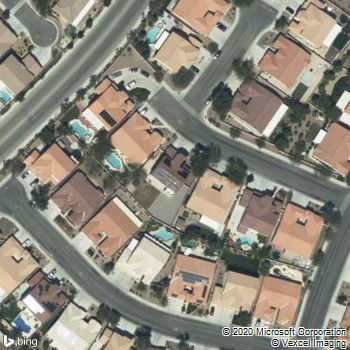

In [4]:
photo = ai.get_photo(lat=36.2806, long = -115.1626)
photo

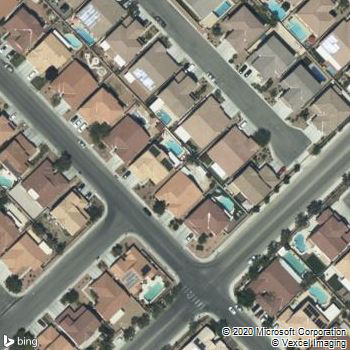

In [5]:
photo = ai.get_photo(lat=36.2806, long = -115.1645)
photo

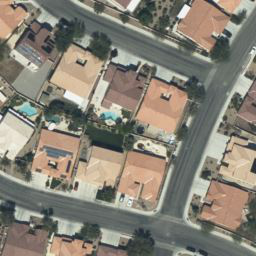

In [6]:
ai.get_square_photo(lat=36.280659, long = -115.162661)

## Photo Grid

To cover terrain we will need to get the centers of subterrains represented by photos. 

In [7]:
ai.get_coords(38.684290723162526,-121.53796608554585, 38.683101470549765,-121.53249437915547)

array([[[  38.68429122, -121.53796613],
        [  38.68321921, -121.53796613],
        [  38.6821472 , -121.53796613]],

       [[  38.68429122, -121.53659284],
        [  38.68321921, -121.53659284],
        [  38.6821472 , -121.53659284]],

       [[  38.68429122, -121.53521955],
        [  38.68321921, -121.53521955],
        [  38.6821472 , -121.53521955]],

       [[  38.68429122, -121.53384626],
        [  38.68321921, -121.53384626],
        [  38.6821472 , -121.53384626]],

       [[  38.68429122, -121.53247297],
        [  38.68321921, -121.53247297],
        [  38.6821472 , -121.53247297]]])

They can be visualized with the following method. Please **DO NOT visualize big terrains**. It internally uses `get_coords` to work, then it stitches the photos together

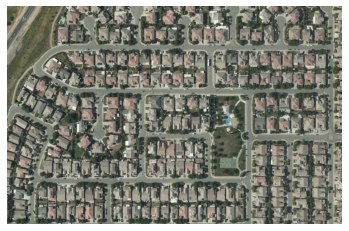

In [8]:
arr, plt = ai.get_grid_photos(38.684290723162526,-121.53796608554585, 38.683101470549765,-121.53249437915547)

`arr` (first argument) is array with photos

In [ ]:
arr[9]

arr[9]

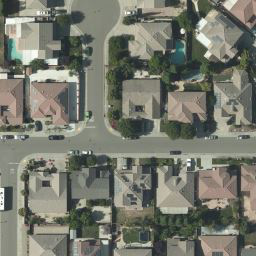

In [13]:
arr[9]